<a href="https://colab.research.google.com/github/Tatyana-Stoyanova/KNN_vs_DecisionTree/blob/main/KNNvsDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #Import KNeighborClassifier

Load dataset

In [ ]:
breast_cancer = pd.read_csv("Breast_cancer_data.csv")


In [ ]:
breast_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
breast_cancer.shape

(569, 6)

Convert Dataframe to numpy array

In [ ]:
breast_cancer = breast_cancer.to_numpy()

Feature Selection - split dataset in features and labels variable

In [ ]:
features_b=breast_cancer[:,0:5]
labels_b = breast_cancer[:,-1]

In [ ]:
features_b.shape

(569, 5)

In [ ]:
labels_b.shape

(569,)

Split dataset into training set and test set - 70% training and 30% test

In [ ]:
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(
    features_b,labels_b, test_size = 0.2, random_state=42)

Create Decision Tree classifer object

In [ ]:
dt_breast_cancer = DecisionTreeClassifier(random_state=42)

Train Decision Tree Classifer

In [ ]:
dt_breast_cancer.fit(x_train_b,y_train_b)

DecisionTreeClassifier(random_state=42)

Predict the output for test dataset

In [ ]:
y_prediction_b = dt_breast_cancer.predict(x_test_b)

Model Accuracy, how often is the classifier correct

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_b, y_prediction_b))

Accuracy: 0.9035087719298246


Create KNN classifier

In [ ]:
knn_breast_cancer = KNeighborsClassifier(n_neighbors=5)

Train the model using the training sets

In [ ]:
knn_breast_cancer.fit(x_train_b,y_train_b)

KNeighborsClassifier()

Predict the output for test dataset

In [ ]:
predict_breast_cancer = knn_breast_cancer.predict(x_test_b)

Model Accuracy, how often is the classifier correct

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_b, predict_breast_cancer))

Accuracy: 0.9385964912280702


Define Classes

In [ ]:
classes = ['ill', 'healty']

Plot onfusion matrix for decision tree

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


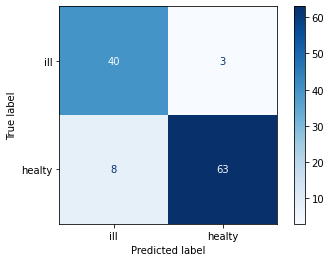

In [ ]:
plot_confusion_matrix(dt_breast_cancer, x_test_b, y_test_b, display_labels=classes, 
                      cmap=plt.cm.Blues)

Plot confusion matrix for KNN

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


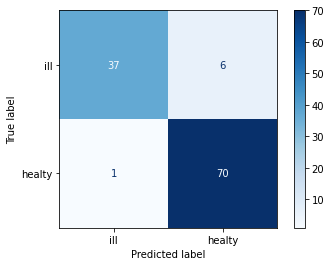

In [ ]:
plot_confusion_matrix(knn_breast_cancer, x_test_b, y_test_b, display_labels=classes, 
                      cmap=plt.cm.Blues)